### R notebook to read data and attempt forecasting model

#### Date: 18/01/2014

In [228]:
df = read.table('C://Users//barro//Dropbox//a2i2_flashfarma//Estudos//Historico_Categorias_daily.csv', header = TRUE, sep = ",", dec = ".")

In [229]:
# Dimensions of the dataframe
dim(df)

[1] 1247   62

#### To verify if reading was done correctly - pay attention to dates and whatever (if any) was read as factor

In [230]:
str(df)   

'data.frame':	1247 obs. of  62 variables:
 $ Data            : Factor w/ 1247 levels "01-01-13","01-01-14",..: 1 42 83 124 165 206 247 288 329 370 ...
 $ Dia.da.Semana   : int  3 4 5 6 7 1 2 3 4 5 ...
 $ Feriado_Nacional: int  1 0 0 0 0 0 0 0 0 0 ...
 $ Carnaval        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pascoa          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Tiradentes      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dia_Trabalho    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Corpus_Christi  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Independencia   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NSAparecida     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Finados         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Republica       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Natal           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Reveillon       : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Qtde_Total      : int  41 541 272 493 352 200 414 397 432 493 ...
 $ ValPago_Total   : num  423 5324 3426 5420 4228 ...
 $ Qtde_cat_0      : int  12 52 29 33 55 23 51 28 46 40 ...
 $ ValPago_cat_0

In [231]:
df$Data = as.Date(df$Data, format = "%d-%m-%y")

In [232]:
head(df, n = 5)

,Data,Dia.da.Semana,Feriado_Nacional,Carnaval,Pascoa,Tiradentes,Dia_Trabalho,Corpus_Christi,Independencia,NSAparecida,ellip.h,Qtde_cat_18,ValPago_cat_18,Qtde_cat_19,ValPago_cat_19,Qtde_cat_20,ValPago_cat_20,Qtde_cat_21,ValPago_cat_21,Qtde_cat_22,ValPago_cat_22
1,2013-01-01,3,1,0,0,0,0,0,0,0,<8b>,1,6.7,NA,NA,7,31.62,NA,NA,NA,NA
2,2013-01-02,4,0,0,0,0,0,0,0,0,<8b>,NA,NA,3,164.37,47,350.66,NA,NA,NA,NA
3,2013-01-03,5,0,0,0,0,0,0,0,0,<8b>,1,4.99,NA,NA,46,435.45,NA,NA,2,23.15
4,2013-01-04,6,0,0,0,0,0,0,0,0,<8b>,NA,NA,NA,NA,49,539.24,NA,NA,NA,NA
5,2013-01-05,7,0,0,0,0,0,0,0,0,<8b>,5,36.26,NA,NA,38,505.27,NA,NA,NA,NA


In [233]:
# Attaches the data frame, so we don´t need to refer to its name and the column name all the time
attach(df)

The following objects are masked from df (pos = 8):

    Carnaval, Corpus_Christi, Data, Dia.da.Semana, Dia_Trabalho,
    Feriado_Nacional, Finados, Independencia, Natal, NSAparecida,
    Pascoa, Qtde_cat_0, Qtde_cat_1, Qtde_cat_10, Qtde_cat_11,
    Qtde_cat_12, Qtde_cat_13, Qtde_cat_14, Qtde_cat_15, Qtde_cat_16,
    Qtde_cat_17, Qtde_cat_18, Qtde_cat_19, Qtde_cat_2, Qtde_cat_20,
    Qtde_cat_21, Qtde_cat_22, Qtde_cat_3, Qtde_cat_4, Qtde_cat_5,
    Qtde_cat_6, Qtde_cat_7, Qtde_cat_8, Qtde_cat_9, Qtde_Total,
    Republica, Reveillon, Tiradentes, ValPago_cat_0, ValPago_cat_1,
    ValPago_cat_10, ValPago_cat_11, ValPago_cat_12, ValPago_cat_13,
    ValPago_cat_14, ValPago_cat_15, ValPago_cat_16, ValPago_cat_17,
    ValPago_cat_18, ValPago_cat_19, ValPago_cat_2, ValPago_cat_20,
    ValPago_cat_21, ValPago_cat_22, ValPago_cat_3, ValPago_cat_4,
    ValPago_cat_5, ValPago_cat_6, ValPago_cat_7, ValPago_cat_8,
    ValPago_cat_9, ValPago_Total



In [25]:
? lag()

lag {stats},R Documentation
x,A vector or matrix or univariate or multivariate time series
k,The number of lags (in units of observations).
...,further arguments to be passed to or from methods.


### Creating lagged values of the Total Daily Revenue

In [234]:
df$Data[1:15]

 [1] "2013-01-01" "2013-01-02" "2013-01-03" "2013-01-04" "2013-01-05"
 [6] "2013-01-06" "2013-01-07" "2013-01-08" "2013-01-09" "2013-01-10"
[11] "2013-01-11" "2013-01-12" "2013-01-13" "2013-01-14" "2013-01-15"

### Need to call xts package, which needs to be previously installed

In [235]:
require(xts)

In [236]:
# Converting column to time series
df$ValPago_Total = as.xts(df$ValPago_Total, as.Date(df$Data, format = "%d-%m-%y"))

In [243]:
df$ValPago_Total[1:5]

              [,1]
2013-01-01  422.59
2013-01-02 5323.96
2013-01-03 3425.79
2013-01-04 5419.51
2013-01-05 4228.21

### Create lagged variables

In [244]:
df$l1_ValPago_total=lag(df$ValPago_Total,1)  # verificar se é + 1 ou -1 afinal!

In [245]:
df$l1_ValPago_Total[1:5] # verificar pq está dando erro agora

NULL

In [246]:
str(df$l1_ValPago_Total)

 NULL


In [249]:
df[1:5,c(15,16, 60:63)]   # ooops, não fez o que eu queria . whyyyyyyy?????

,Qtde_Total,ValPago_Total,ValPago_cat_21,Qtde_cat_22,ValPago_cat_22,l1_ValPago_total
1,41,1,NA,NA,NA,1
2,541,1,NA,NA,NA,1
3,272,1,NA,2,23.15,1
4,493,1,NA,NA,NA,1
5,352,1,NA,NA,NA,1


In [250]:
df$l2_ValPago_total=lag(df$ValPago_Total,2)

In [251]:
df[1:5,c(15,16, 60:64)] # mistake again. whyyyyyyy?????

,Qtde_Total,ValPago_Total,ValPago_cat_21,Qtde_cat_22,ValPago_cat_22,l1_ValPago_total,l2_ValPago_total
1,41,1,NA,NA,NA,1,1
2,541,1,NA,NA,NA,1,1
3,272,1,NA,2,23.15,1,1
4,493,1,NA,NA,NA,1,1
5,352,1,NA,NA,NA,1,1


In [119]:
df$l3_ValPago_total=lag(df$ValPago_Total,3)

In [120]:
df$l4_ValPago_total=lag(df$ValPago_Total,4)

In [121]:
df$l5_ValPago_total=lag(df$ValPago_Total,5)

In [122]:
df$l6_ValPago_total=lag(df$ValPago_Total,6)

In [123]:
df$l7_ValPago_total=lag(df$ValPago_Total,7)

In [124]:
df$l8_ValPago_total=lag(df$ValPago_Total,8)

In [125]:
df$l9_ValPago_total=lag(df$ValPago_Total,9)

In [126]:
df$l10_ValPago_total=lag(df$ValPago_Total,10)

In [127]:
df$l11_ValPago_total=lag(df$ValPago_Total,11)

In [128]:
df$l12_ValPago_total=lag(df$ValPago_Total,12)

In [129]:
df$l13_ValPago_total=lag(df$ValPago_Total,13)

In [130]:
df$l14_ValPago_total=lag(df$ValPago_Total,14)

In [169]:
# Dimension of the dataframe with the recently created columns of lagged revenues
dim(df)

[1] 1247   76

### Installing Graphics packages

In [140]:
library(ggplot2)

Warning message:
: package 'ggplot2' was built under R version 3.2.3

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous
Warning message:
: Removed 238 rows containing missing values (geom_path).

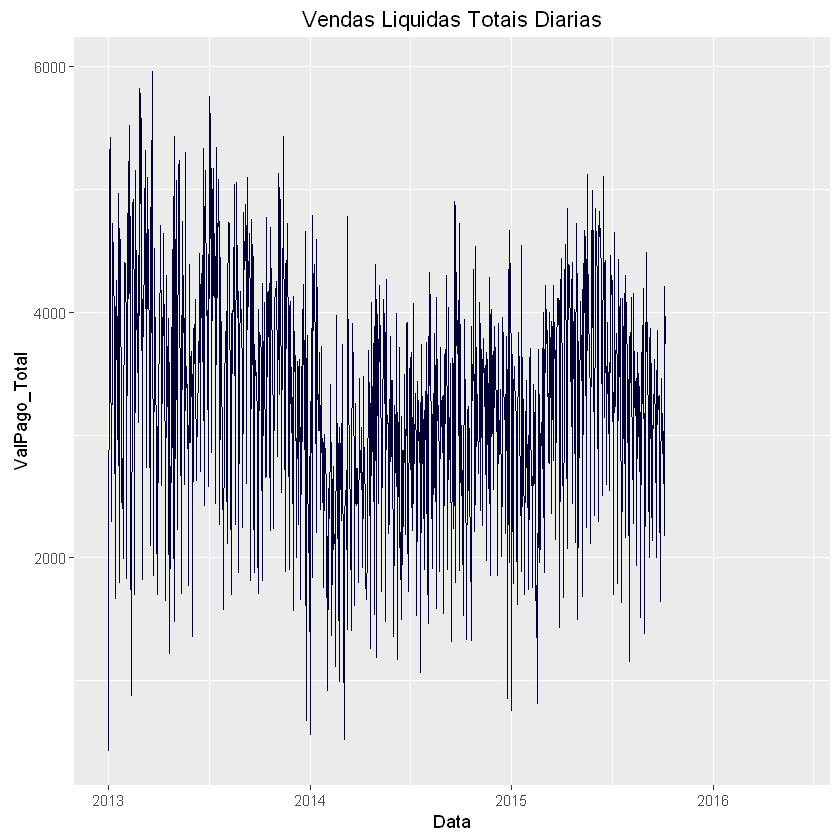

In [181]:
ggplot(df, aes(Data, ValPago_Total)) + geom_line(color='#000033') + ggtitle("Vendas Liquidas Totais Diarias")

### Calculate Autocorrelation Function and Partial Autocorrelation Function of Total Daily Revenue - note seasonal peaks

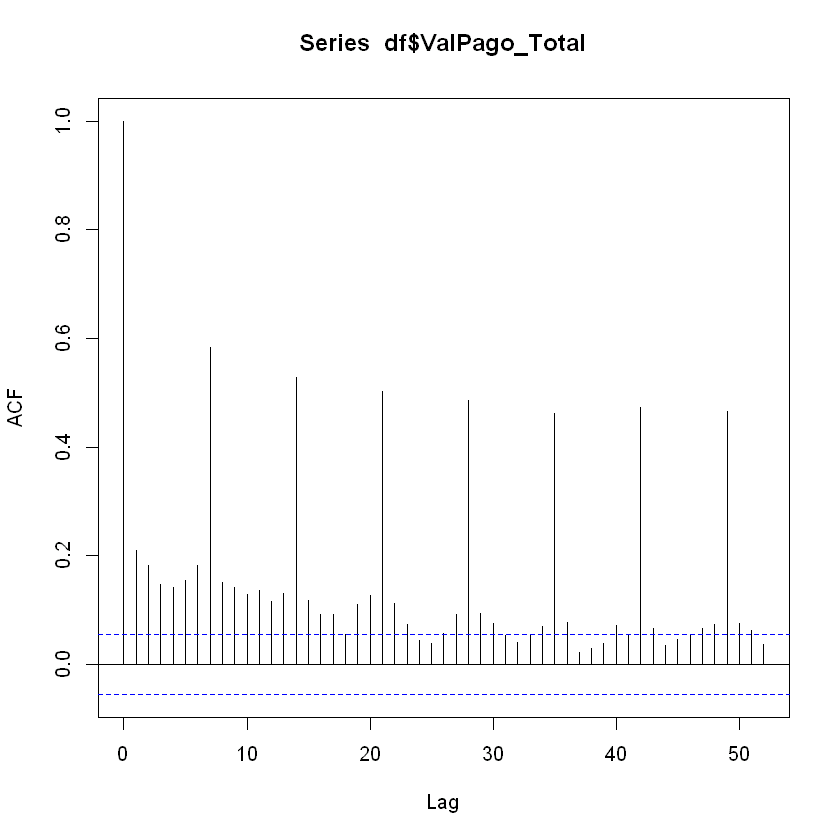

In [168]:
acf(df$ValPago_Total, na.action = na.pass,lag.max = 52)

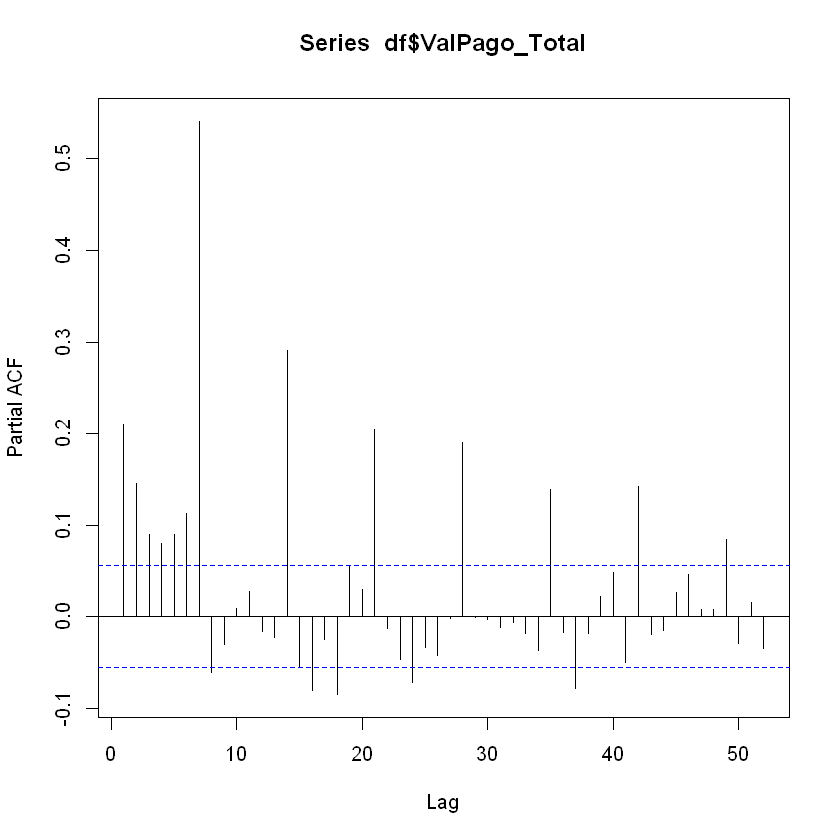

In [170]:
pacf(df$ValPago_Total, na.action = na.pass,lag.max = 52)

In [182]:
? HoltWinters()

HoltWinters {stats},R Documentation
x,An object of class ts
alpha,alpha parameter of Holt-Winters Filter.
beta,"beta parameter of Holt-Winters Filter. If set to FALSE, the function will do exponential smoothing."
gamma,"gamma parameter used for the seasonal component. If set to FALSE, an non-seasonal model is fitted."
seasonal,"Character string to select an ""additive"" (the default) or ""multiplicative"" seasonal model. The first few characters are sufficient. (Only takes effect if gamma is non-zero)."
start.periods,Start periods used in the autodetection of start values. Must be at least 2.
l.start,Start value for level (a[0]).
b.start,Start value for trend (b[0]).
s.start,Vector of start values for the seasonal component (s_1[0] … s_p[0])
optim.start,"Vector with named components alpha, beta, and gamma containing the starting values for the optimizer. Only the values needed must be specified. Ignored in the one-parameter case."


In [189]:
# create new dataset without missing data 
newdata <- na.omit(df$ValPago_Total)

In [191]:
tail(newdata)

              [,1]
2015-10-01 2895.76
2015-10-02 2848.93
2015-10-03 3032.31
2015-10-04 2179.27
2015-10-05 4210.80
2015-10-06 3735.74

In [195]:
str(newdata)

An 'xts' object on 2013-01-01/2015-10-06 containing:
  Data: num [1:1009, 1] 423 5324 3426 5420 4228 ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 1
 $ na.action:Class 'omit'  atomic [1:238] 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 ...
  .. ..- attr(*, "index")= num [1:238] 1.44e+09 1.44e+09 1.44e+09 1.44e+09 1.44e+09 ...


In [194]:
hw_m = HoltWinters(newdata)#, frequency = 7, seasonal = "mult")

ERROR: Error in decompose(ts(x[1L:wind], start = start(x), frequency = f), seasonal): time series has no or less than 2 periods


In [ ]:
plot(hw_m)

### Call Dynamic Linear Regression Package (needs to be previously installed with all dependencies)

In [196]:
library("dynlm")

Warning message:
: package 'dynlm' was built under R version 3.2.3

In [197]:
dfm <- dynlm(newdata ~ L(newdata, 1) + L(newdata, 7))
dfm

Warning message:
In zoo(coredata(x), order.by = index(x), ...): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(coredata(x), order.by = index(x), ...): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(coredata(x), order.by = index(x), ...): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval, index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval, index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval, index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' are not uniqueWarning message:
In zoo(rval, index(x)[i]): some methods for "zoo" objects do not work if the index entries in 'order.by' ar

ERROR: Error in `row.names<-.data.frame`(`*tmp*`, value = value): duplicate 'row.names' are not allowed


ERROR: Error in eval(expr, envir, enclos): object 'dfm' not found


In [198]:
data("UKDriverDeaths", package = "datasets")
uk <- log10(UKDriverDeaths)

In [199]:
str(uk)

 Time-Series [1:192] from 1969 to 1985: 3.23 3.18 3.18 3.14 3.21 ...


In [200]:
str(newdata)

An 'xts' object on 2013-01-01/2015-10-06 containing:
  Data: num [1:1009, 1] 423 5324 3426 5420 4228 ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 1
 $ na.action:Class 'omit'  atomic [1:238] 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 ...
  .. ..- attr(*, "index")= num [1:238] 1.44e+09 1.44e+09 1.44e+09 1.44e+09 1.44e+09 ...
